In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas import Series,DataFrame
import datetime
from matplotlib import style
import matplotlib as mpl
import random 
import numpy as np

In [4]:
start=datetime.datetime(2005,1,1)
end=datetime.datetime(2020,8,7)

df=web.DataReader("LT.NS",'yahoo',start,end)
df.tail()
# df['Adj Close'].plot(title='LnT closing price')


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,959.500000,946.650024,953.099976,951.200012,3900219.0,951.200012
2020-07-07,961.900024,940.000000,955.000000,943.599976,4051767.0,943.599976
2020-07-08,964.400024,938.000000,944.950012,941.250000,5227021.0,941.250000
2020-07-09,952.000000,940.000000,945.000000,944.950012,3777760.0,944.950012
2020-07-10,952.000000,930.549988,940.000000,932.150024,4536106.0,932.150024


C:\Users\Aryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


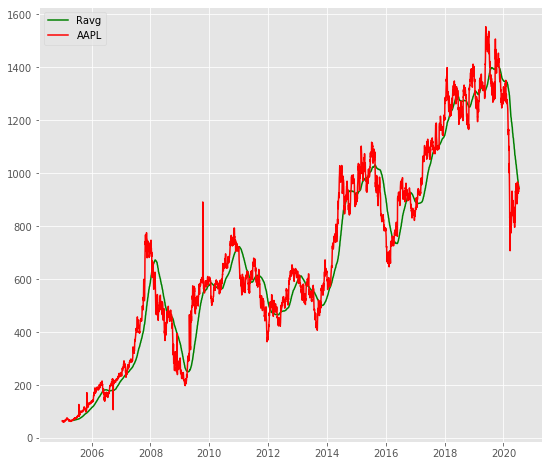

In [5]:
mpl.rc('figure',figsize=(9,8))
# mpl._version_
style.use('ggplot')
close_price=df['Adj Close']
ravg=close_price.rolling(window=100).mean()
ravg.tail(10)

plt.plot(df.index,ravg,c='green',label='Ravg')
plt.plot(df.index,close_price,c='red',label='AAPL')
# plt.bar(df.index,df['Volume'])
plt.legend()
plt.show()

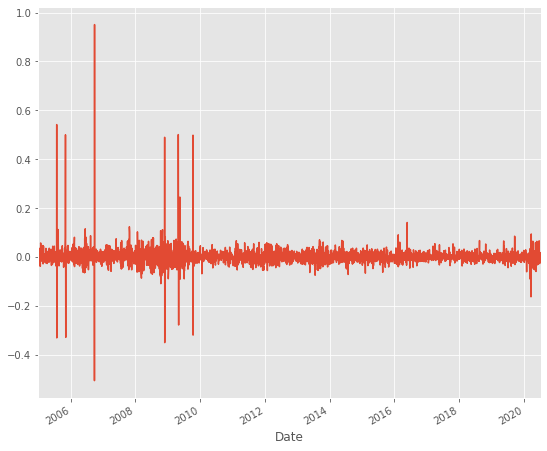

In [6]:
rets = close_price / close_price.shift(1) - 1
rets.plot(label='return')

In [87]:
dfcomp=web.DataReader(['GOOG','AAPL','TSLA','NFLX'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,GOOG,AAPL,TSLA,NFLX
Date,,,,
2020-07-06,1495.699951,373.850006,1371.579956,493.809998
2020-07-07,1485.180054,372.690002,1389.859985,493.160004
2020-07-08,1496.000000,381.369995,1365.880005,502.779999
2020-07-09,1510.989990,383.010010,1394.280029,507.760010
2020-07-10,1529.839966,383.252991,1492.436523,545.070007


In [88]:
# returns=dfcomp.pct_change()
returns=dfcomp/dfcomp.shift(1)-1
corr =returns.corr()
corr
returns=returns*100
# plt.scatter(returns['LT.NS'],returns['DLF.NS'])
# plt.xlabel('Lnt')
# plt.ylabel('DLF')
# plt.show
returns.mean()

Symbols
GOOG    0.088483
AAPL    0.138759
TSLA    0.223438
NFLX    0.199946
dtype: float64

In [294]:
plt.scatter(returns['LT.NS'],returns['DLF.NS'])
plt.xlabel('Lnt')
plt.ylabel('DLF')
plt.show

KeyError: 'DLF.NS'

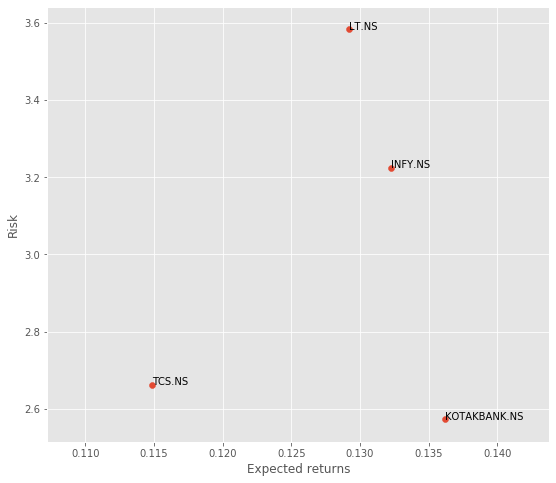

In [298]:
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy = (x, y))

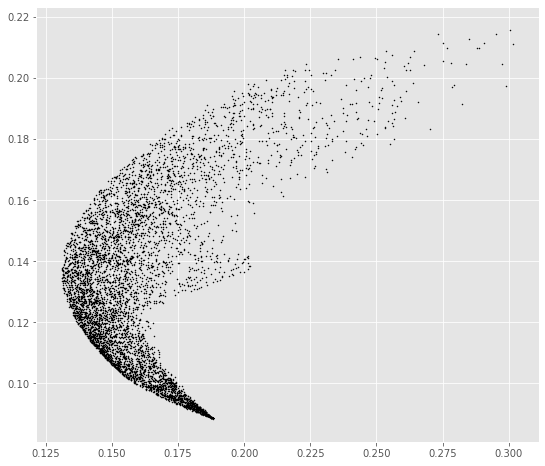

In [93]:
rmean=returns.mean().values
rstd=returns.std().values
num_port=6000
a=np.zeros(num_port)
b=np.zeros(num_port)
allweights=np.zeros((num_port,len(returns.columns)))
sharpe=np.zeros(num_port)
w=np.zeros(4)
wf1=[]
wf2=[]
wf3=[]
wf4=[]

for i in range(0,num_port):
        # Save weights
#     w = np.array(np.random.random(4))
#     w = w/(np.sum(w))
    w[0]=random.random()
    w[1]=random.random()*(1-w[0])
    w[2]=random.random()*(1-w[0]-w[1])
    w[3]=1-w[0]-w[1]-w[2]
    allweights[i,:] = w
    
    # Expected return
    a[i] = (w[0]*rmean[0]+w[1]*rmean[1]+w[2]*rmean[2]+w[3]*rmean[3])
#     w=w.reshape(-1,1)
    # Expected volatility
    b[i] = np.sqrt(w[0]*w[0]*rstd[0]*rstd[0]+w[1]*w[1]*rstd[1]*rstd[1]+w[2]*w[2]*rstd[2]*rstd[2]+w[3]*w[3]*rstd[3]*rstd[3]+2*w[0]*w[1]*corr.iloc[0,1]+2*w[0]*w[2]*corr.iloc[0,2]+2*w[0]*w[3]*corr.iloc[0,3]+2*w[1]*w[2]*corr.iloc[1,2]+2*w[1]*w[3]*corr.iloc[1,3]+2*w[2]*w[3]*corr.iloc[2,3])/10
#     b[i]=np.sqrt(np.dot(w.T,np.dot(rstd*252, w)))
    sharpe[i]=a[i]/b[i]
    
#     plt.scatter(b[i],a[i],c='black',s=1)
plt.scatter(b,a,c='black',s=1)
# plt.show()

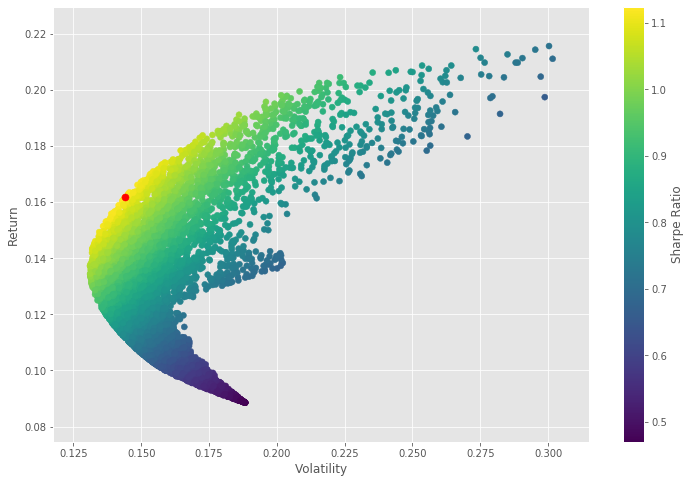

In [94]:
sharpe.max()
sharpe.argmax()
maxreturn=a[sharpe.argmax()]
maxrisk=b[sharpe.argmax()]
plt.figure(figsize=(12,8))
plt.scatter(b, a, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxrisk, maxreturn,c='red', s=50) # red dot
plt.show()

In [98]:
maxreturn/maxrisk


1.1238605255470078

In [ ]:
get_vol_ret_sr(w):
    w=np.array(w)
    ret=